In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# xor task
xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

In [37]:
# https://aimatters.wordpress.com/2016/01/16/solving-xor-with-a-neural-network-in-tensorflow/
with tf.Graph().as_default() as g:
    x_input = tf.placeholder( tf.float32 ,  [None, 2] , name='x_input' )
    y_label = tf.placeholder( tf.float32 , [None, 1] , name='y_label' )
    
    # start building your model and meet the requirements
    # from here
    number_hidden_nodes = 30
    Theta1 = tf.Variable(tf.random_uniform([2,number_hidden_nodes], -1, 1), name = "Theta1")
    Theta2 = tf.Variable(tf.random_uniform([number_hidden_nodes,1], -1, 1), name = "Theta2")
    Bias1 = tf.Variable(tf.zeros([number_hidden_nodes]), name = "Bias1")
    Bias2 = tf.Variable(tf.zeros([1]), name = "Bias2")
    with tf.name_scope("layer2") as scope:
        A2 = tf.sigmoid(tf.matmul(x_input, Theta1) + Bias1)

    with tf.name_scope("layer3") as scope:
        Hypothesis = tf.sigmoid(tf.matmul(A2, Theta2) + Bias2)

    with tf.name_scope("cost") as scope:
        cost = tf.reduce_mean(( (y_label * tf.log(Hypothesis)) + ((1 - y_label) * tf.log(1.0 - Hypothesis)) ) * -1)

    with tf.name_scope("train") as scope:
        train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
        
    with tf.name_scope("accuracy") as scope:
        correct_prediction = tf.equal(y_label , tf.to_float(tf.to_int32(Hypothesis > 0.5)))# argmax along dim-1
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) # [True, False, True, True] -> [1,0,1,1] -> 0.75.
        
    var_init_op = tf.global_variables_initializer()
        
with tf.Session(graph=g) as sess:
    # start run the seesion and meet the requrements
    # from here 
    sess.run(var_init_op)
    for i in range(20000):
        sess.run(train_step, feed_dict={x_input: xor_data, y_label: xor_label})
#         if i%10000==0 or i==100000-1:
    print('Epoch ', i)
    print('Hypothesis ', sess.run(Hypothesis, feed_dict={x_input: xor_data, y_label: xor_label}))
    print('Theta1 ', sess.run(Theta1))
    print('Bias1 ', sess.run(Bias1))
    print('Theta2 ', sess.run(Theta2))
    print('Bias2 ', sess.run(Bias2))
    print('cost ', sess.run(cost, feed_dict={x_input: xor_data, y_label: xor_label}))
    print('accuracy: ',sess.run(accuracy, feed_dict={x_input: xor_data, y_label: xor_label}))
    print()

Epoch  19999
Hypothesis  [[0.85836625]
 [0.8545869 ]
 [0.17017888]
 [0.10559744]]
Theta1  [[ 0.14300452  0.7830573   3.7792304   0.21455818  0.16214927  2.144812
   0.18659179 -0.03180014  1.1321781  -1.0074774  -0.157866   -0.2630893
  -0.7917679   0.8725356   1.5414064   0.14288256 -0.18899837 -0.49919847
  -0.45449406  0.5581853  -1.7585096   2.7437491  -0.5511488   0.10902152
  -2.753455    0.30134913 -0.4575635  -0.0364867  -0.94139856 -1.5982351 ]
 [ 0.7135928   0.15387589 -2.9494364  -0.3424827  -0.75019926  2.2385962
  -0.11019188 -0.25981072 -0.34282792 -0.03722726  0.5549921   0.6134684
   0.40972045  0.16483898 -0.6502068  -0.20751597  0.4792363  -0.678674
  -0.7251267  -0.5996201  -1.894942    2.688422   -0.21433839 -0.5128222
   3.6089613  -0.84492713 -0.12132396 -0.31417677  0.42025536  2.450662  ]]
Bias1  [-0.24817428  0.08220017  1.5750337  -0.04076822 -0.03829433  0.0695172
  0.03043243  0.05665643  0.19583584  0.19161753  0.10425753 -0.00969029
 -0.3269017  -0.2614341

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print("training data size: {}".format(mnist.train.num_examples))
print("validation data size: {}".format(mnist.validation.num_examples))
print("testing data size: {}".format(mnist.test.num_examples))

print("Shape of image: {}".format(mnist.train.images[0].shape))
print("Shape of label: {}".format(mnist.train.labels[0].shape))

training data size: 55000
validation data size: 5000
testing data size: 10000
Shape of image: (784,)
Shape of label: (10,)


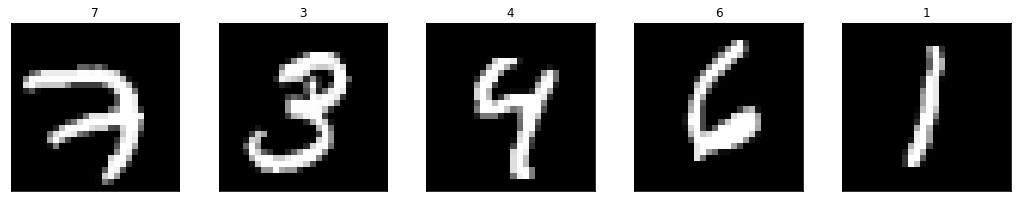

In [6]:
n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(mnist.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [27]:
with tf.Graph().as_default() as g:
    ## meet the requirements
    ## then you will
    # setting 
    feature_dims = 784 # example with 784 features
    neurons = 2000 # fully connected layer with 1024 neurons
    classes = 10 # 10 classes classification problem
    x_input = tf.placeholder( tf.float32 ,  [None, feature_dims] , name='x_input' )
    y_label = tf.placeholder( tf.float32 , [None, classes] , name='y_label' )
    p_keep_input = tf.placeholder(tf.float32)
    p_keep_hidden = tf.placeholder(tf.float32)
    number_hidden_nodes1 = 1024
    number_hidden_nodes2 = 625
    Theta1 = tf.Variable(tf.random_uniform([feature_dims , number_hidden_nodes1], -1, 1), name = "Theta1")
    Theta2 = tf.Variable(tf.random_uniform([number_hidden_nodes1 , number_hidden_nodes2], -1, 1), name = "Theta2")
    Theta3 = tf.Variable(tf.random_uniform([number_hidden_nodes2,classes], -1, 1), name = "Theta3")
#     Bias1 = tf.Variable(tf.zeros([number_hidden_nodes]), name = "Bias1")
#     Bias2 = tf.Variable(tf.zeros([number_hidden_nodes1]), name = "Bias2")
#     Bias3 = tf.Variable(tf.zeros([classes]), name = "Bias3")
    
    def fully_connected_layer(x_inputs, weights,name='fc'):
        with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
            out = tf.nn.relu(tf.matmul(x_inputs, weights))
            return out
    with tf.name_scope("layer2") as scope:
        x_input = tf.nn.dropout(x_input, p_keep_input)
        A2 = fully_connected_layer(x_input,Theta1)
        A2 = tf.nn.dropout(A2, p_keep_hidden)
    
    with tf.name_scope("layer3") as scope:
        A3 = fully_connected_layer(A2,Theta2)
        A3 = tf.nn.dropout(A3, p_keep_hidden)

    with tf.name_scope("layer4") as scope:
        Hypothesis = tf.matmul(A3, Theta3)

    with tf.name_scope("cost") as scope:
#         cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) ; y_label Hypothesis
#         cost = tf.reduce_mean(-tf.reduce_sum(y_label * tf.clip_by_value(Hypothesis, 1e-10, 1.0), reduction_indices=[1]))
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Hypothesis, labels=y_label))

    with tf.name_scope("train") as scope:
#         train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
          train_step = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
#         train_step = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9).minimize(cost)
        
    with tf.name_scope("accuracy") as scope:
        correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(Hypothesis, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    var_init_op = tf.global_variables_initializer()
    
with tf.Session(graph=g) as sess:
    ## just do it
    sess.run(var_init_op)
    batch_size = 100
    keep_input = 0.8
    keep_hidden = 0.75
    num_data = mnist.train.num_examples + mnist.validation.num_examples
    for i in range(30000):
        input_images, correct_predictions = mnist.train.next_batch(batch_size)
        test_acc = sess.run(accuracy, feed_dict={x_input: mnist.test.images, y_label: mnist.test.labels,p_keep_input: keep_input, p_keep_hidden: keep_hidden})
        if test_acc >= 0.95:
            print('test accuracy: ',test_acc)
            print('test iteration: ',i)
            break
#             print('cost ', sess.run(cost, feed_dict={x_input: input_images, y_label: correct_predictions,p_keep_input: keep_input, p_keep_hidden: keep_hidden}))
        sess.run(train_step, feed_dict={x_input: input_images, y_label: correct_predictions,p_keep_input: keep_input, p_keep_hidden: keep_hidden})




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

test accuracy:  0.9504
test iteration:  8426
